In [2]:
!pip install numpy

In [3]:
!pip install pandas

  Using cached pandas-2.1.1-cp312-cp312-win_amd64.whl.metadata (18 kB)
  Using cached pytz-2023.3.post1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
Using cached pandas-2.1.1-cp312-cp312-win_amd64.whl (10.5 MB)
Using cached pytz-2023.3.post1-py2.py3-none-any.whl (502 kB)


In [4]:
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

     ---------------------------------------- 0.0/155.5 kB ? eta -:--:--
     ---------------------------------------- 0.0/155.5 kB ? eta -:--:--
     ---------------------------------------- 0.0/155.5 kB ? eta -:--:--
     ---------------------------------------- 0.0/155.5 kB ? eta -:--:--
     ---------------------------------------- 0.0/155.5 kB ? eta -:--:--
     ---------------------------------------- 0.0/155.5 kB ? eta -:--:--
     ---------------------------------------- 0.0/155.5 kB ? eta -:--:--
     ---------------------------------------- 0.0/155.5 kB ? eta -:--:--
     ---------------------------------------- 0.0/155.5 kB ? eta -:--:--
     ---------------------------------------- 0.0/155.5 kB ? eta -:--:--
     -- ------------------------------------- 10.2/155.5 kB ? eta -:--:--
     -- ------------------------------------- 10.2/155.5 kB ? eta -:--:--
     -- ------------------------------------- 10.2/155.5 kB ? eta -:--:--
     -- ------------------------------------- 10

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("Heart.csv")
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [7]:
df.shape

(303, 15)

In [8]:
df.isnull().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64

In [9]:
print("Total missing values: ", df.isnull().sum().sum())

Total missing values:  6


In [10]:
df.dtypes

Unnamed: 0      int64
Age             int64
Sex             int64
ChestPain      object
RestBP          int64
Chol            int64
Fbs             int64
RestECG         int64
MaxHR           int64
ExAng           int64
Oldpeak       float64
Slope           int64
Ca            float64
Thal           object
AHD            object
dtype: object

In [11]:
(df == 0).sum(axis=0)

Unnamed: 0      0
Age             0
Sex            97
ChestPain       0
RestBP          0
Chol            0
Fbs           258
RestECG       151
MaxHR           0
ExAng         204
Oldpeak        99
Slope           0
Ca            176
Thal            0
AHD             0
dtype: int64

In [12]:
mean_age =df['Age'].mean()
mean_age

54.43894389438944

In [13]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs',
       'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
      dtype='object')

In [15]:
df2 = df.filter(['Age','Sex','ChestPain','RestBP','Chol'])
df2

,Age,Sex,ChestPain,RestBP,Chol
0,63,1,typical,145,233
1,67,1,asymptomatic,160,286
2,67,1,asymptomatic,120,229
3,37,1,nonanginal,130,250
4,41,0,nontypical,130,204
...,...,...,...,...,...
298,45,1,typical,110,264
299,68,1,asymptomatic,144,193
300,57,1,asymptomatic,130,131
301,57,0,nontypical,130,236


In [16]:
mean = df['Ca'].mean()
df['Ca'].fillna(value=mean,inplace=True)
mode = df['Thal'].mode().iloc[0]
df['Thal'].fillna(value=mode, inplace=True)
df.isnull().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            0
Thal          0
AHD           0
dtype: int64

C:\Users\Dell\AppData\Local\Temp\ipykernel_4448\1301061305.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='AHD',data=df, palette='pastel')


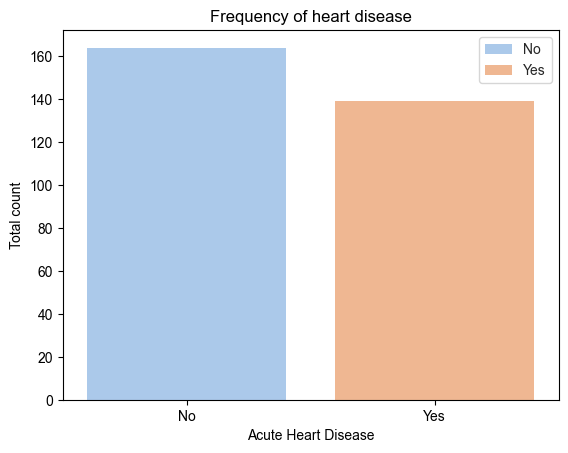

In [17]:
sns.countplot(x='AHD',data=df, palette='pastel')
sns.set_style("whitegrid")
plt.xlabel("Acute Heart Disease")
plt.ylabel("Total count")
plt.title("Frequency of heart disease")
plt.legend(['No','Yes'],loc='upper right')

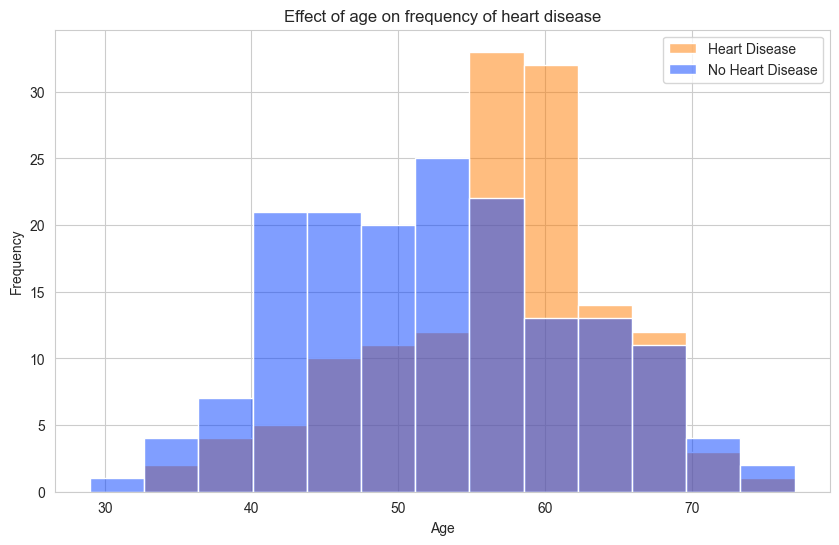

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.histplot(x="Age", data=df, hue="AHD", palette="bright")
sns.set_style("whitegrid")
plt.title("Effect of age on frequency of heart disease")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend(["Heart Disease","No Heart Disease"])
plt.show()

In [19]:
df['ChestPain'].unique()

array(['typical', 'asymptomatic', 'nonanginal', 'nontypical'],
      dtype=object)

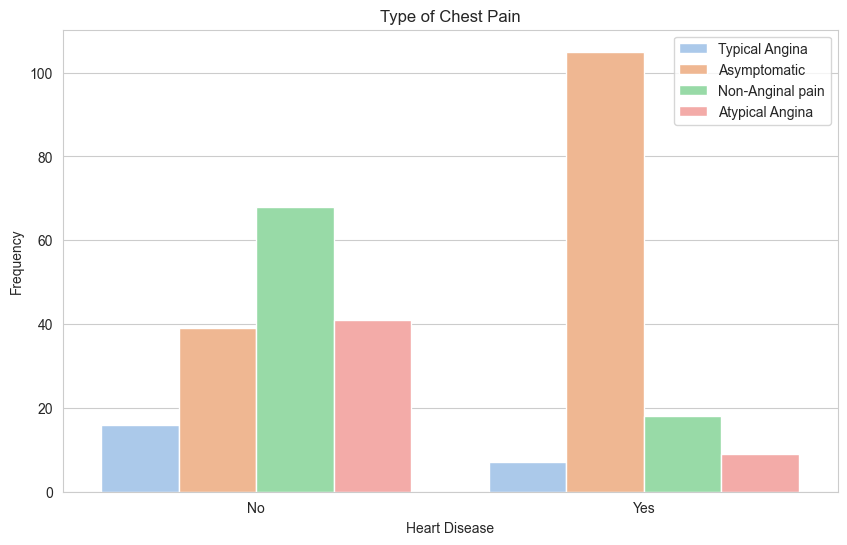

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.countplot(x="AHD", hue="ChestPain", data=df, palette="pastel")
plt.title("Type of Chest Pain")
plt.xlabel("Heart Disease")
plt.ylabel("Frequency")
plt.legend(["Typical Angina","Asymptomatic", "Non-Anginal pain",
"Atypical Angina"])
plt.show()

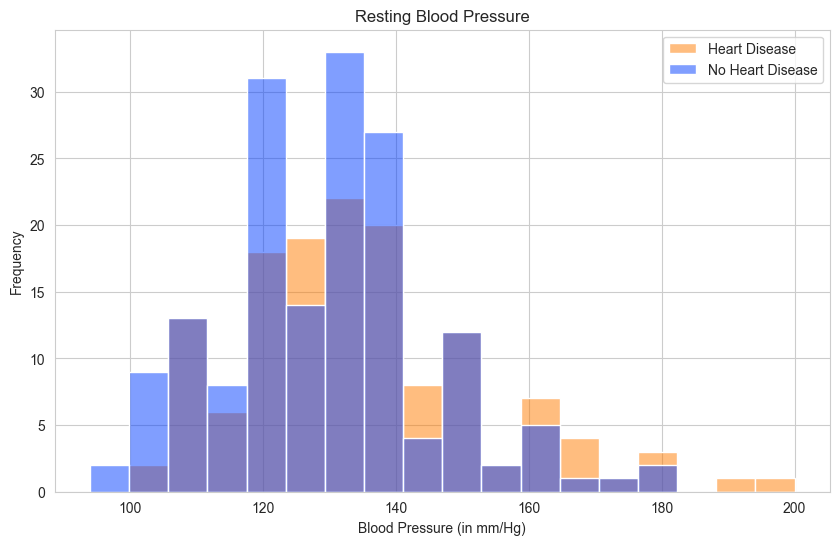

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.histplot(x="RestBP" , data=df, hue="AHD", palette="bright")
sns.set_style("whitegrid")
plt.title("Resting Blood Pressure")
plt.xlabel("Blood Pressure (in mm/Hg)")
plt.ylabel("Frequency")
plt.legend(["Heart Disease","No Heart Disease"])
plt.show()

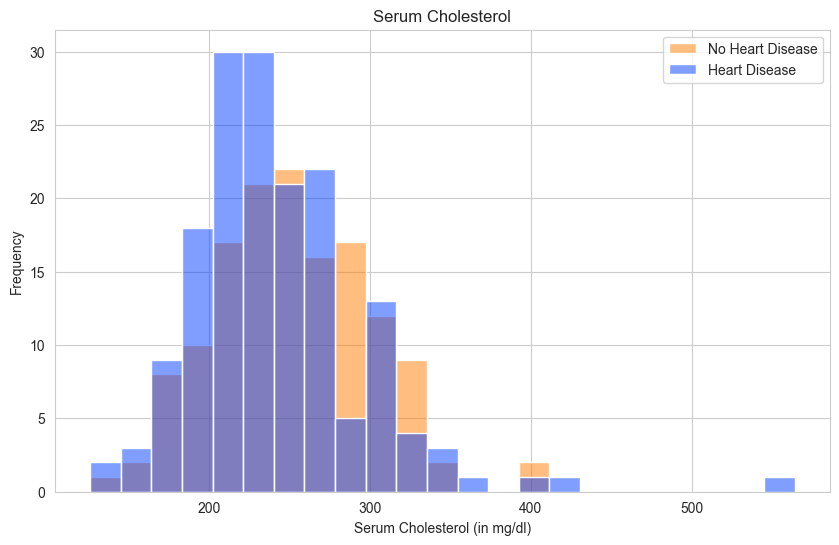

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.histplot(x="Chol" , data=df, hue="AHD", palette="bright")
sns.set_style("whitegrid")
plt.title("Serum Cholesterol")
plt.xlabel("Serum Cholesterol (in mg/dl)")
plt.ylabel("Frequency")
plt.legend(["No Heart Disease","Heart Disease"])
plt.show()

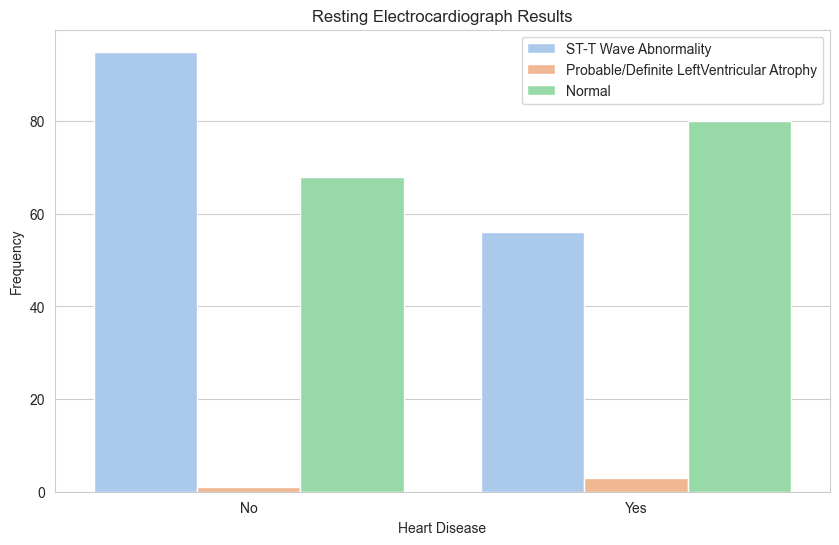

In [24]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.countplot(x="AHD", hue="RestECG", data=df, palette="pastel")
plt.title("Resting Electrocardiograph Results")
plt.xlabel("Heart Disease")
plt.ylabel("Frequency")
plt.legend(["ST-T Wave Abnormality", "Probable/Definite LeftVentricular Atrophy", "Normal"])
plt.show()

In [25]:
X = df[['Age','Sex','ChestPain','RestBP','Chol','RestECG','MaxHR']]
Y= df['AHD']

In [27]:
from sklearn.model_selection import train_test_split

X_train, Y_train, X_test, Y_test =train_test_split(X,Y,test_size=0.25)